In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import glob
import re
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import ttest_ind

In [2]:
#load model output files
s1raw=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run2d_2000_d02.nc')
s2raw=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run2d_eas0c_d02.nc')
# s1a=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_01_d02.nc')
# s1b=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_02_d02.nc')
# s1c=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_03_d02.nc')
# s2a=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_01_d02.nc')
# s2b=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_02_d02.nc')
# s2c=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_03_d02.nc')
#load geography files
geo02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/geo_em.d02.nc')

(36, 170, 173)


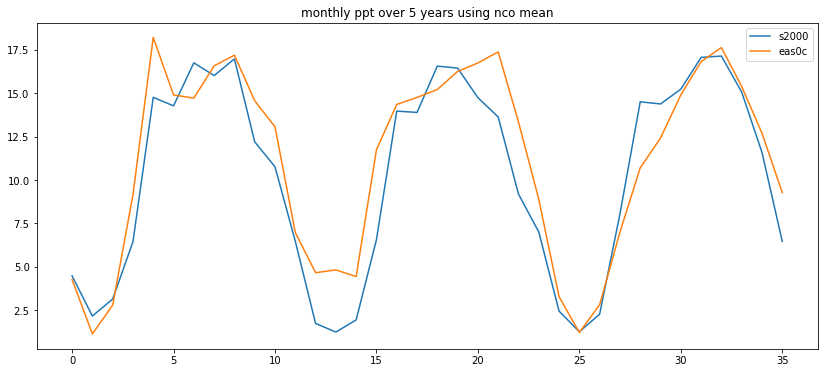

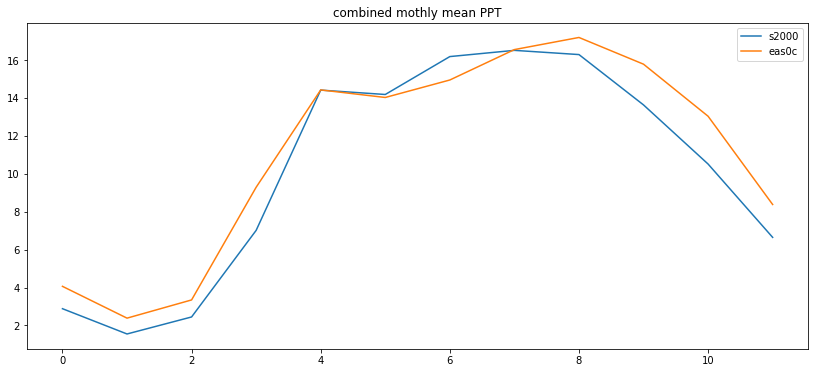

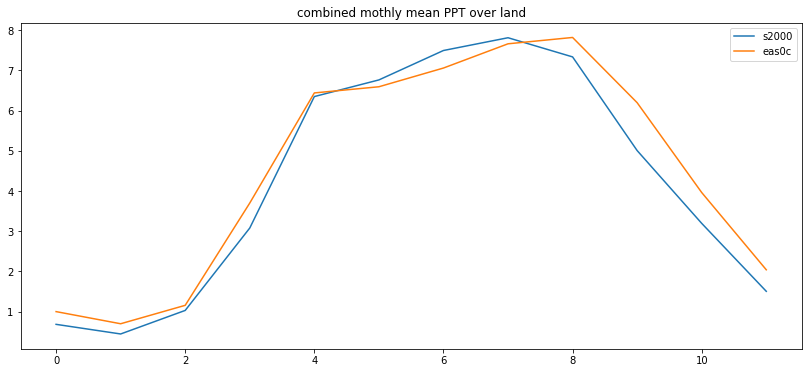

In [3]:
plt.rcParams["figure.figsize"] = 14,6

#cut to last 3 years
s1rawa=s1raw.sel(time=slice('2052-01-01', '2055-01-01'))
s2rawa=s2raw.sel(time=slice('2052-01-01', '2055-01-01'))

def resampleWind(data):
    return data.U10.resample('1M',dim='time',how='mean'), data.V10.resample('1M',dim='time',how='mean')
s1_mth=s1rawa.PPT.resample('1M',dim='time',how='mean')
s2_mth=s2rawa.PPT.resample('1M',dim='time',how='mean')
s1U10,s1V10=resampleWind(s1raw)
s2U10,s2V10=resampleWind(s2raw)
# s1a_mtha=s1a.PPT.resample('1M',dim='time',how='mean')
# s2a_mtha=s2a.PPT.resample('1M',dim='time',how='mean')
# s1b_mtha=s1b.PPT.resample('1M',dim='time',how='mean')
# s2b_mtha=s2b.PPT.resample('1M',dim='time',how='mean')
# s1c_mtha=s1c.PPT.resample('1M',dim='time',how='mean')
# s2c_mtha=s2c.PPT.resample('1M',dim='time',how='mean')
# s1aU10,s1aV10=resampleWind(s1a)
# s1bU10,s1bV10=resampleWind(s1b)
# s1cU10,s1cV10=resampleWind(s1c)
# s2aU10,s2aV10=resampleWind(s2a)
# s2bU10,s2bV10=resampleWind(s2b)
# s2cU10,s2cV10=resampleWind(s2c)

landmsk=s1raw.LANDMASK.data
plt.figure(1)
plt.plot(np.mean(s1_mth,axis=(1,2)),label='s2000')
plt.plot(np.mean(s2_mth,axis=(1,2)),label='eas0c')
plt.title('monthly ppt over 5 years using nco mean')
plt.legend()
print(np.shape(s1_mth))
#aggregate into 12 monthly means
s1=s1_mth.groupby('time.month').mean(axis=0)
s2=s2_mth.groupby('time.month').mean(axis=0)
s1_u10=s1U10.groupby('time.month').mean(axis=0)
s1_v10=s1V10.groupby('time.month').mean(axis=0)
s2_u10=s2U10.groupby('time.month').mean(axis=0)
s2_v10=s2V10.groupby('time.month').mean(axis=0)
plt.figure(2)
plt.plot(np.mean(s1,axis=(1,2)),label='s2000')
plt.plot(np.mean(s2,axis=(1,2)),label='eas0c')
plt.title('combined mothly mean PPT')
plt.legend()
plt.figure(3)
plt.plot(np.mean(s1*landmsk[:12,:,:],axis=(1,2)),label='s2000')
plt.plot(np.mean(s2*landmsk[:12,:,:],axis=(1,2)),label='eas0c')
plt.title('combined mothly mean PPT over land')
plt.legend()
plt.show()

In [72]:
#plots from individual runs.To run this code you'll have to read in all the individual run files.

# plt.rcParams["figure.figsize"] = 14,6
# plt.figure(1)
# plt.plot(np.mean(s1a_mtha,axis=(1,2)),label='s2000, 01')
# plt.plot(np.mean(s1b_mtha,axis=(1,2)),label='s2000, 02')
# plt.plot(np.mean(s1c_mtha,axis=(1,2)),label='s2000, 03')
# plt.plot(np.mean(s2a_mtha,axis=(1,2)),label='eas0c, 01')
# plt.plot(np.mean(s2b_mtha,axis=(1,2)),label='eas0c, 02')
# plt.plot(np.mean(s2c_mtha,axis=(1,2)),label='eas0c, 03')
# plt.title('monthly ppt over 5 years')
# plt.legend()

# plt.figure(2)
# plt.plot(np.mean(s1aU10,axis=(1,2)),label='s1aU10, 01')
# plt.plot(np.mean(s1bU10,axis=(1,2)),label='s1bU10, 02')
# plt.plot(np.mean(s1cU10,axis=(1,2)),label='s1cU10, 03')
# plt.plot(np.mean(s2aU10,axis=(1,2)),label='s2aU10, 01')
# plt.plot(np.mean(s2bU10,axis=(1,2)),label='s2bU10, 02')
# plt.plot(np.mean(s2cU10,axis=(1,2)),label='s2cU10, 03')
# plt.title('monthly U over 5 years')
# plt.legend()
# plt.show()


NameError: name 's1a_mtha' is not defined

In [75]:
print(np.shape(s1raw.LANDMASK))

(1825, 170, 173)


In [14]:
#data overview
print('year, s2000, eas0c, diff %')
# print('50-54: {:.4f} {:.4f} {:.2f}%'.format(np.mean(s1a.PPT.data),np.mean(s2a.PPT.data),\
#                                            (np.mean(s2a.PPT.data)-np.mean(s1a.PPT.data))/np.mean(s1a.PPT.data)*100))
# print('69-73: {:.4f} {:.4f} {:.2f}%'.format(np.mean(s1b.PPT.data),np.mean(s2b.PPT.data),\
#                                            (np.mean(s2b.PPT.data)-np.mean(s1b.PPT.data))/np.mean(s1b.PPT.data)*100))
# print('90-94: {:.4f} {:.4f} {:.2f}%'.format(np.mean(s1c.PPT.data),np.mean(s2c.PPT.data),\
#                                            (np.mean(s2c.PPT.data)-np.mean(s1c.PPT.data))/np.mean(s1c.PPT.data)*100))
print('mean: {:.4f} {:.4f} {:.2f}%'.format(np.mean(s1.data),np.mean(s2.data),(np.mean(s2.data)-np.mean(s1.data))/np.mean(s1.data)*100))
landmsk=s1raw.LANDMASK.data
landmsk[landmsk == 0] = np.nan

print('mean over land {:.4f} {:.4f} {:.2f}%'.format(np.nanmean(s1*landmsk[:12,:,:].data),np.nanmean(s2*landmsk[:12,:,:].data),\
                                                       (np.nanmean(s2*landmsk[:12,:,:].data)-np.nanmean(s1*landmsk[:12,:,:].data))/np.nanmean(s1*landmsk[:12,:,:].data)*100))

year, s2000, eas0c, diff %
mean: 10.1881 11.1170 9.12%
mean over land 7.7872 8.3445 7.16%


#### data from individual runs
year, s2000, eas0c, diff %
50-54: 9.4236 10.3650 9.99%
69-73: 9.3686 10.7211 14.44%
90-94: 9.5697 10.3455 8.11%
mean: nan 10.4339 nan%
mean over land 7.1484 7.7204 8.00%

Month is 1 Mean diff over land: 0.3188, 59.56%


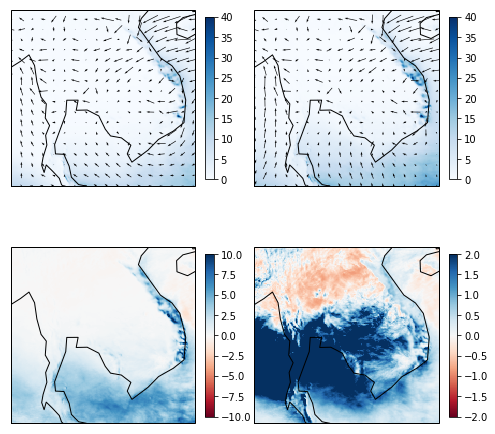

Month is 2 Mean diff over land: 0.2295, 66.19%


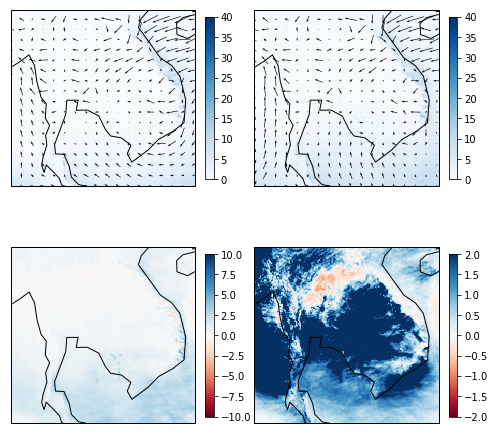

Month is 3 Mean diff over land: 0.1397, 15.88%


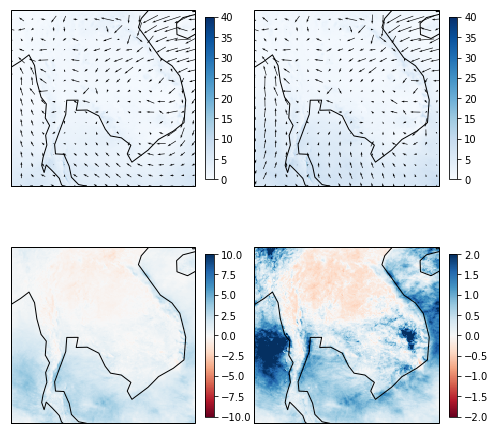

Month is 4 Mean diff over land: 0.3840, 14.64%


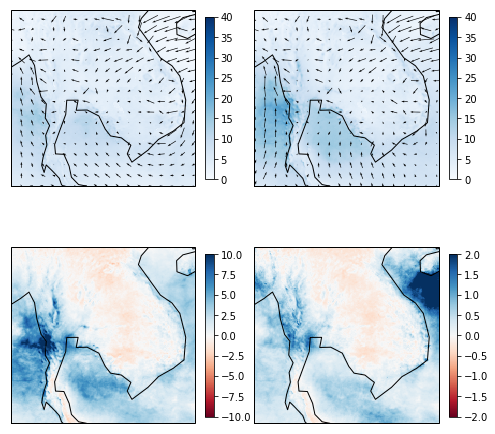

Month is 5 Mean diff over land: 0.6411, 11.88%


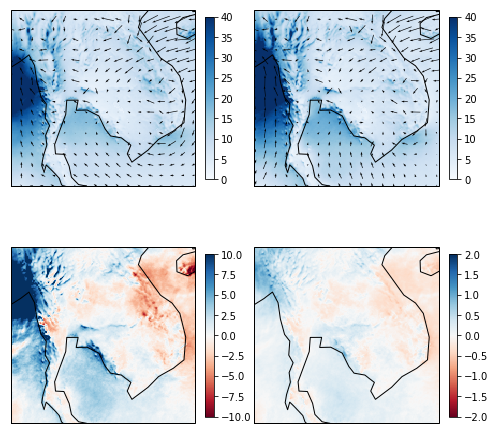

Month is 6 Mean diff over land: 0.2730, 4.60%


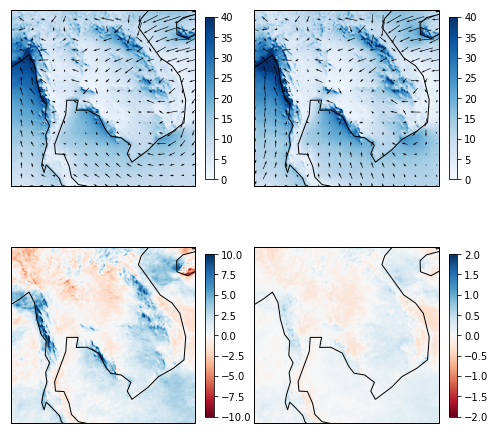

Month is 7 Mean diff over land: -0.3641, -5.19%


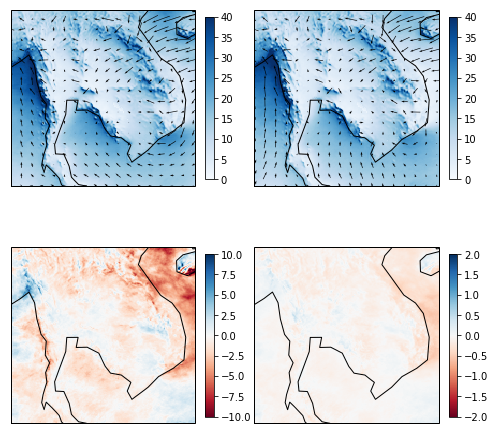

Month is 8 Mean diff over land: 0.1323, 1.74%


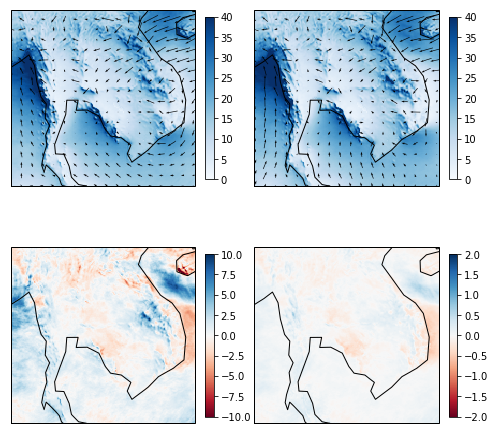

Month is 9 Mean diff over land: 0.2790, 3.89%


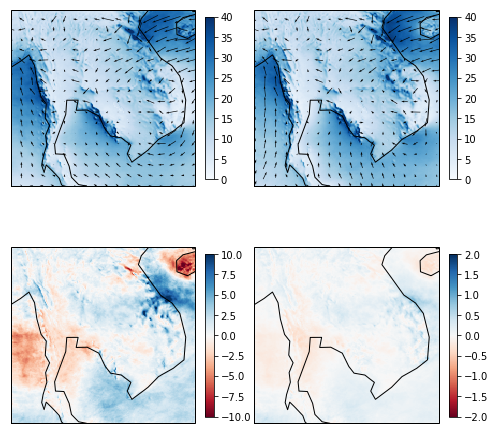

Month is 10 Mean diff over land: 0.7167, 14.69%


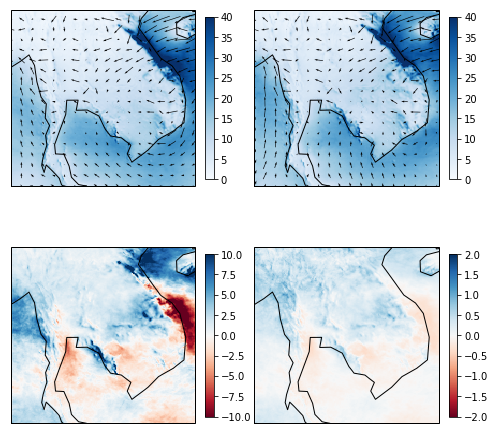

Month is 11 Mean diff over land: 0.6727, 25.12%


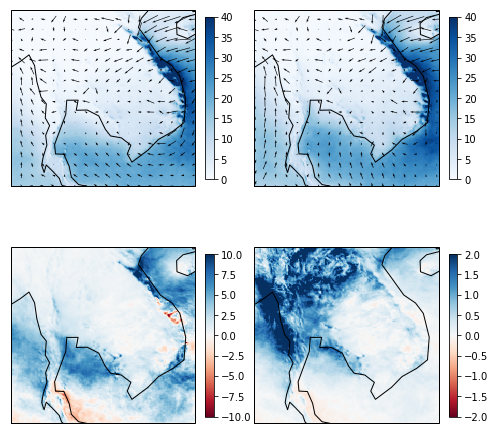

Month is 12 Mean diff over land: 0.3060, 20.69%


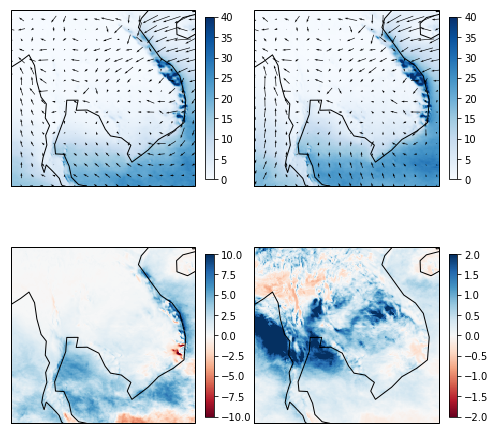

In [14]:
landmsk=s1raw.LANDMASK.data
plt.rcParams["figure.figsize"] = 8,8
base=s1.data
base[base == 0]=np.nan
diffabs=[]
diffratio=[]
for tt in range(0,12):
    plt.figure(tt)
    uwind1=np.mean(s1_u10[:,::10,::10],axis=0)
    vwind1=np.mean(s1_v10[:,::10,::10],axis=0)
    slon1 = s1raw.lon[0::10]
    slat1 = s1raw.lat[0::10]
    uwind2=np.mean(s2_u10[:,::10,::10],axis=0)
    vwind2=np.mean(s2_v10[:,::10,::10],axis=0)
    slon2 = s2raw.lon[0::10]
    slat2 = s2raw.lat[0::10]
    ax1=plt.subplot(2,2,1,projection=ccrs.PlateCarree())
    ax1.pcolor(s1raw.lon, s1raw.lat,s1[tt,:,:],vmin=0,vmax=40,cmap='Blues')
    ax1.quiver(slon1,slat1,uwind1,vwind1,pivot='middle')
    ax1.coastlines()
    ax2=plt.subplot(2,2,2,projection=ccrs.PlateCarree())
    ax2.pcolor(s1raw.lon,s1raw.lat,s2[tt,:,:],vmin=0,vmax=40,cmap='Blues')
    ax2.quiver(slon2,slat2,uwind2,vwind2,pivot='middle')
    ax2.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=40))
    sm._A = []
    plt.colorbar(sm,ax=ax2,fraction=0.04, pad=0.05)
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05)
    ax3=plt.subplot(2,2,3,projection=ccrs.PlateCarree())
    ax3.pcolor(s1raw.lon,s1raw.lat,s2[tt,:,:]-s1[tt,:,:],vmax=10,vmin=-10,cmap='RdBu')
    ax3.coastlines()
    cmap = plt.get_cmap('RdBu')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=-10, vmax=10))
    sm._A = []
    plt.colorbar(sm,ax=ax3,fraction=0.04, pad=0.05)
    ax4=plt.subplot(2,2,4,projection=ccrs.PlateCarree())
    ratiomap=(s2[tt,:,:]-s1[tt,:,:])/(base[tt,:,:])
#     m = np.ma.masked_where(np.isnan(ratiomap),ratiomap)
#     m=np.ma.masked_invalid(ratiomap)
    cmap = plt.get_cmap('RdBu')
    cmap.set_bad('k')
    ax4.pcolor(s1raw.lon,s1raw.lat,ratiomap,vmax=2,vmin=-2,cmap=cmap)
    ax4.coastlines()
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=-2., vmax=2.))
    sm._A = []
    plt.colorbar(sm,ax=ax4,fraction=0.04, pad=0.05)
    diffabs.append(np.nanmean(s2[tt,:,:]*landmsk[0,:,:]-s1[tt,:,:]*landmsk[0,:,:]))
    diffratio.append((np.nanmean(s2[tt,:,:]*landmsk[0,:,:])-np.nanmean(s1[tt,:,:]*landmsk[0,:,:]))/np.nanmean(s1[tt,:,:]*landmsk[0,:,:])*100)
    
    print('Month is {} Mean diff over land: {:.4f}, {:.2f}%'.format(tt+1,np.nanmean(s2[tt,:,:]*landmsk[0,:,:]-s1[tt,:,:]*landmsk[0,:,:]),\
                                                          (np.nanmean(s2[tt,:,:]*landmsk[0,:,:])-np.nanmean(s1[tt,:,:]*landmsk[0,:,:]))/np.nanmean(s1[tt,:,:]*landmsk[0,:,:])*100))
    plt.show()

[0.31880266137949997, 0.22954305953181114, 0.13965830977554752, 0.38397909122260654, 0.6411361714675613, 0.27299582792637445, -0.36409708321826473, 0.13232818708721317, 0.27897152906797101, 0.71670570090560748, 0.6727225732352462, 0.30597307804292417]


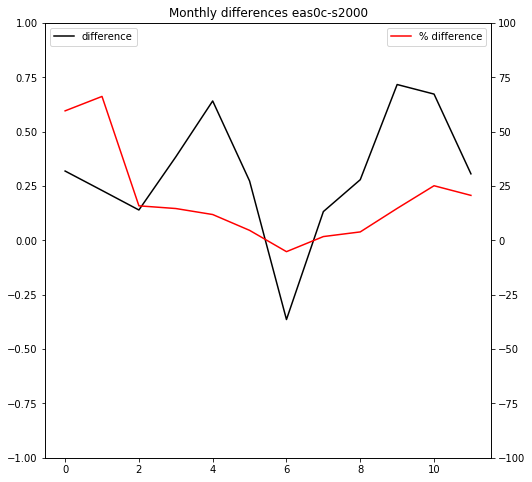

In [38]:
print((diffabs))
fig, ax1=plt.subplots()
ax1.plot(diffabs,label='difference',color='black')
plt.legend(loc=2)
ax2=ax1.twinx()
ax2.plot(diffratio,label='% difference',color='red')
ax1.set_title('Monthly differences eas0c-s2000')
plt.legend()
ax1.set_ylim(-1.,1.)
ax2.set_ylim(-100.,100.)
plt.show()

In [39]:
avediff=np.mean(s2-s1,axis=0)
avediffratio=np.mean((s2-s1)/s1,axis=0)
print(np.shape(s1))
print(np.shape(avediff))
t1,p1 = ttest_ind(s2raw.PPT,s1raw.PPT)
pp1 = np.ma.masked_greater(p1, 0.1)


(12, 170, 173)
(170, 173)


In [36]:
#to prove that masked in ma.masekd_greater means remove.
# a=[1,2,3,4,5]
# b=[1,2,3,4,5]
# t1,p1=ttest_ind(a,b)
# print(t1,p1)
# pp1=np.ma.masked_greater(p1,0.1)
# print(pp1)

0.0 1.0
--


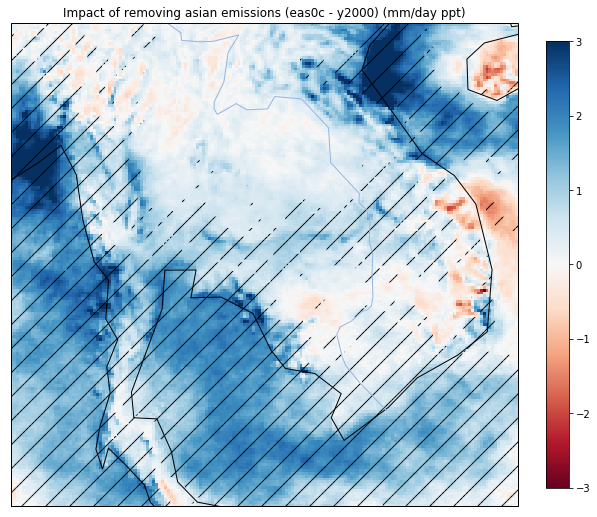

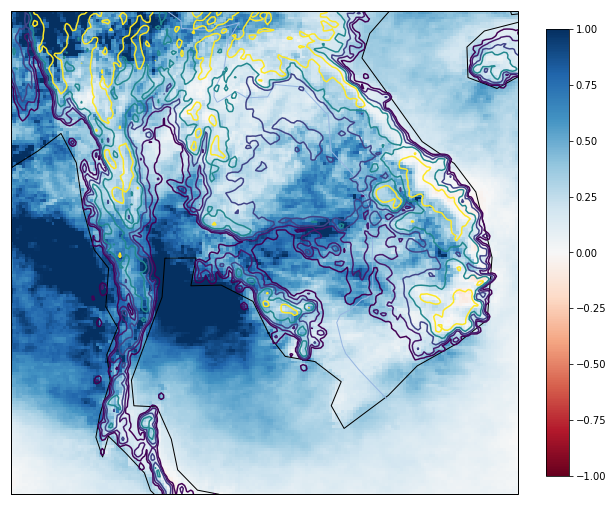

0.928850344951


In [42]:
#plot average difference over time in whole domain
plt.rcParams["figure.figsize"] = 10,10
plt.figure(1)
ax=plt.subplot(projection=ccrs.PlateCarree())
ax.pcolor(s1raw.lon,s1raw.lat,avediff,cmap='RdBu',vmin=-3,vmax=3)
# ax.contour(s1raw.lon,s1raw.lat,geo02.HGT_M[0,5:-5,5:-5],levels=[50,100,200,400,800])
ax.coastlines()
ax.add_feature(cfeature.RIVERS)
cmap = plt.get_cmap('RdBu')
sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=-3, vmax=3))
sm._A = []
plt.colorbar(sm,ax=ax,fraction=0.04, pad=0.05)
ax.pcolor(s1raw.lon, s1raw.lat, pp1, hatch='/', alpha=0.)
plt.title('Impact of removing asian emissions (eas0c - y2000) (mm/day ppt)')

plt.figure(2)
ax=plt.subplot(projection=ccrs.PlateCarree())
ax.pcolor(s1raw.lon,s1raw.lat,avediffratio,cmap='RdBu',vmin=-1,vmax=1)
ax.contour(s1raw.lon,s1raw.lat,geo02.HGT_M[0,5:-5,5:-5],levels=[50,100,200,400,800])
ax.coastlines()
ax.add_feature(cfeature.RIVERS)
cmap = plt.get_cmap('RdBu')
sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=-1, vmax=1))
sm._A = []
plt.colorbar(sm,ax=ax,fraction=0.04, pad=0.05)
plt.show()
print(np.nanmean(avediff))

## Comparisons for qcloud

In [2]:
c1=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run3d_2000_d02.nc')
c2=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run3d_eas0c_d02.nc')

<xarray.Dataset>
Dimensions:   (lat: 170, lon: 173, lvl: 29, time: 1825)
Coordinates:
  * time      (time) datetime64[ns] 2050-01-01 2050-01-02 2050-01-03 ...
  * lvl       (lvl) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * lat       (lat) float32 6.73963 6.82241 6.90515 6.98789 7.07063 7.15334 ...
  * lon       (lon) float32 95.7448 95.8281 95.9115 95.9948 96.0782 96.1615 ...
Data variables:
    LANDMASK  (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    z         (time, lvl, lat, lon) float64 29.76 29.75 29.76 29.77 29.76 ...
    QCLOUD    (time, lvl, lat, lon) float64 6.139e-11 1.245e-09 0.0 0.0 ...
    ALT       (time, lvl, lat, lon) float64 0.8703 0.8703 0.8705 0.8706 ...
Attributes:
    history:                    Mon Oct 16 19:13:47 2017: ncea wrfpost_run_20...
    NCO:                        "4.6.1"
    nco_openmp_thread_number:   1
    history_of_appended_files:  Sat Oct 14 05:28:48 2017: Appended file /home...
28
(1825, 29, 170, 173)


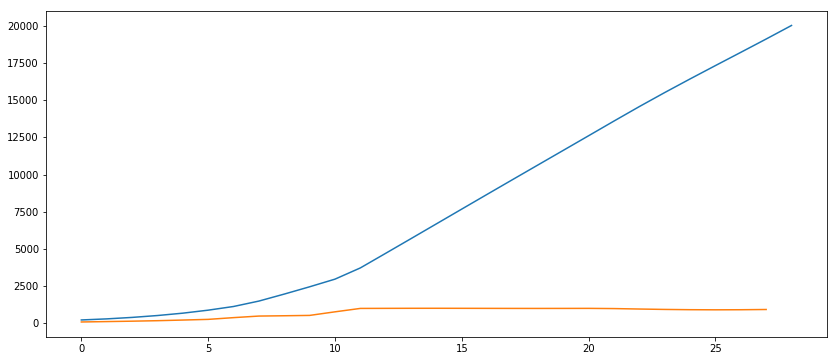

In [3]:
plt.rcParams["figure.figsize"] = 14,6
print(c1)
plt.plot(c1.z[80,:,80,80])

inter=[]
for i in range(1,29):
    inter.append(c1.z[80,i,80,80]-c1.z[80,i-1,80,80])
plt.plot(inter)

print(len(inter))
print(np.shape(c1.z))
plt.show()

In [4]:
#calculate cloud mass per m^2 this assumes z is not cumulative
s1cloud=c1.QCLOUD/c1.ALT*c1.z
s2cloud=c2.QCLOUD/c2.ALT*c1.z

In [5]:
aa=np.sum(s1cloud.data)
bb=np.sum(s2cloud.data)
print('{:.4f}, {:.4f}, {:.4f}, {:.4f}%'.format(aa,bb,bb-aa,(bb-aa)/aa*100))


13876567.7269, 14585170.6110, 708602.8841, 5.1065%


In [6]:
s1cloudcut=s1cloud.sel(time=slice('2052-01-01', '2055-01-01'))
s2cloudcut=s2cloud.sel(time=slice('2052-01-01', '2055-01-01'))
print(np.shape(s1cloud))
s1cloudmtha=s1cloudcut.resample('1M',dim='time',how='mean')
s2cloudmtha=s2cloudcut.resample('1M',dim='time',how='mean')
print(np.shape(s2cloudmtha))
s1cloudmth=s1cloudmtha.groupby('time.month').mean(axis=0)
s2cloudmth=s2cloudmtha.groupby('time.month').mean(axis=0)
# s1cloudmth.to_netcdf('/home/likkhian/dhobyghaut/cesm_output_convert/analysis/downscale_results/qcloud_mth_s2000.nc')
# s2cloudmth.to_netcdf('/home/likkhian/dhobyghaut/cesm_output_convert/analysis/downscale_results/qcloud_mth_eas0c.nc')
# s1cloudmth=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/qcloud_mth_s2000.nc')
# s2cloudmth=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/qcloud_mth_eas0c.nc')
print(np.shape(s1cloudmth))
# print(np.shape(s1cloudmth.__xarray_dataarray_variable__))

(1825, 29, 170, 173)
(36, 29, 170, 173)
(12, 29, 170, 173)


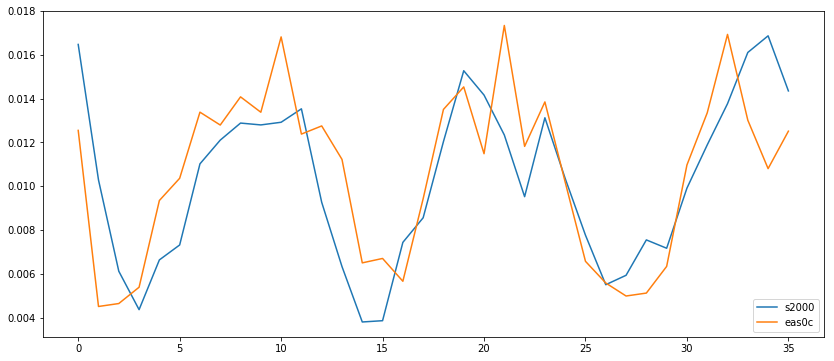

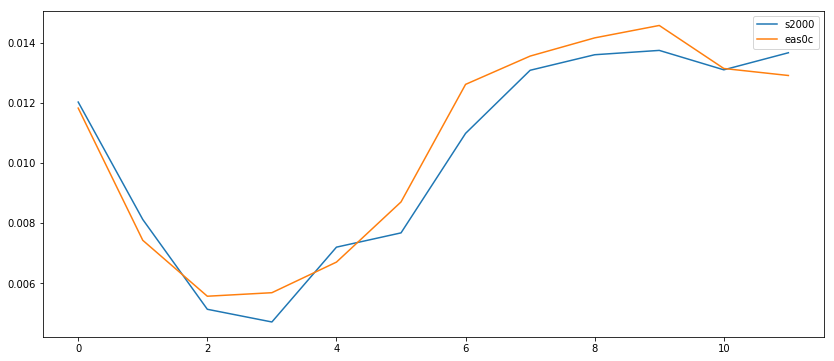

In [7]:
plt.figure(1)
plt.plot(np.mean(s1cloudmtha,axis=(1,2,3)),label='s2000')
plt.plot(np.mean(s2cloudmtha,axis=(1,2,3)),label='eas0c')
plt.legend()

plt.figure(2)
plt.plot(np.mean(s1cloudmth,axis=(1,2,3)),label='s2000')
plt.plot(np.mean(s2cloudmth,axis=(1,2,3)),label='eas0c')
plt.legend()

plt.show()

In [8]:
print('month, s2000, eas0c, eas0c-2000, (eas0c-2000)/2000')
for tt in range(0,12):
    a=np.sum(s1cloudmth[tt,:,:,:].data)#.__xarray_dataarray_variable__[tt,:,:,:].data)
    b=np.sum(s2cloudmth[tt,:,:,:].data)#.__xarray_dataarray_variable__[tt,:,:,:].data)
    print('{}, {:.4f}, {:.4f}, {:.4f}, {:.4f}%'.format(tt+1,a,b,b-a,(b-a)/a*100))
print('All, {:.4f}, {:.4f}, {:.4f}, {:.4f}%'.format(np.sum(s1cloudmth.data),np.sum(s2cloudmth.data),np.sum(s2cloudmth.data)-np.sum(s1cloudmth.data),(np.sum(s2cloudmth.data)-np.sum(s1cloudmth.data))/np.sum(s1cloudmth.data)*100))

month, s2000, eas0c, eas0c-2000, (eas0c-2000)/2000
1, 10263.8396, 10092.1120, -171.7276, -1.6731%
2, 6932.8946, 6342.5810, -590.3136, -8.5147%
3, 4385.7905, 4756.0239, 370.2333, 8.4417%
4, 4025.7188, 4856.2369, 830.5181, 20.6303%
5, 6148.2023, 5724.0534, -424.1489, -6.8987%
6, 6553.1076, 7430.5333, 877.4257, 13.3895%
7, 9375.8804, 10765.6644, 1389.7840, 14.8230%
8, 11165.5405, 11567.9899, 402.4493, 3.6044%
9, 11606.3236, 12084.6815, 478.3579, 4.1215%
10, 11729.1931, 12436.5651, 707.3719, 6.0309%
11, 11178.4660, 11215.9444, 37.4784, 0.3353%
12, 11662.5519, 11017.3541, -645.1979, -5.5322%
All, 105027.5089, 108289.7397, 3262.2308, 3.1061%


### from 3 yrs of data
month, s2000, eas0c, eas0c-2000, (eas0c-2000)/2000 <br>
1, 10263.8396, 10092.1120, -171.7276, -1.6731% <br>
2, 6932.8946, 6342.5810, -590.3136, -8.5147% <br>
3, 4385.7905, 4756.0239, 370.2333, 8.4417% <br>
4, 4025.7188, 4856.2369, 830.5181, 20.6303% <br>
5, 6148.2023, 5724.0534, -424.1489, -6.8987% <br>
6, 6553.1076, 7430.5333, 877.4257, 13.3895% <br>
7, 9375.8804, 10765.6644, 1389.7840, 14.8230% <br>
8, 11165.5405, 11567.9899, 402.4493, 3.6044% <br>
9, 11606.3236, 12084.6815, 478.3579, 4.1215% <br>
10, 11729.1931, 12436.5651, 707.3719, 6.0309% <br>
11, 11178.4660, 11215.9444, 37.4784, 0.3353% <br>
12, 11662.5519, 11017.3541, -645.1979, -5.5322% <br>

### from 5 yrs of data
month, s2000, eas0c, eas0c-2000, (eas0c-2000)/2000 <br>
1, 8182.4760, 8530.1588, 347.6828, 4.2491% <br>
2, 5534.7462, 5541.9107, 7.1645, 0.1294% <br>
3, 3665.7372, 4348.2797, 682.5424, 18.6195% <br>
4, 3277.8825, 3845.5130, 567.6306, 17.3170% <br>
5, 5098.9709, 5393.8096, 294.8387, 5.7823% <br>
6, 5655.6789, 6867.5313, 1211.8524, 21.4272% <br>
7, 8304.8219, 9240.5539, 935.7320, 11.2673% <br>
8, 10357.6125, 11007.8795, 650.2670, 6.2782% <br>
9, 10222.5415, 11112.8884, 890.3469, 8.7096% <br>
10, 10379.1819, 10770.6256, 391.4436, 3.7714% <br>
11, 9573.8657, 9452.8191, -121.0466, -1.2643% <br>
12, 10753.0003, 9574.5381, -1178.4621, -10.9594% <br>

### from the old QCLOUD/ALT method.
month, s2000, eas0c, eas0c-2000, (eas0c-2000)/2000 <br>
1, 2.9401, 4.0482, 1.1081, 37.6895% <br>
2, 2.0836, 2.7201, 0.6366, 30.5525%<br>
3, 1.5781, 2.7416, 1.1635, 73.7331%<br>
4, 0.7897, 1.2373, 0.4477, 56.6905%<br>
5, 0.7766, 1.4627, 0.6861, 88.3409%<br>
6, 1.5147, 2.2099, 0.6952, 45.8989%<br>
7, 3.3710, 2.8347, -0.5363, -15.9086%<br>
8, 4.9462, 4.5077, -0.4384, -8.8644%<br>
9, 4.2341, 4.1415, -0.0927, -2.1885%<br>
10, 3.0768, 2.2144, -0.8624, -28.0300%<br>
11, 2.7405, 2.1833, -0.5573, -20.3337%<br>
12, 3.7496, 3.2070, -0.5426, -14.4705%<br>

In [59]:
landmask=s1a.LANDMASK[0,:,:]
print('month, s2000, eas0c, eas0c-2000, (eas0c-2000)/2000')
for tt in range(0,12):
    a=np.sum(np.sum(s1cloudmth.__xarray_dataarray_variable__[tt,:,:,:].data,axis=0)*landmask.data)
    b=np.sum(np.sum(s2cloudmth.__xarray_dataarray_variable__[tt,:,:,:].data,axis=0)*landmask.data)
#     print((tt+1,a,b,b-a,(b-a)/a))
    print('{}, {:.4f}, {:.4f}, {:.4f}, {:.4f}%'.format(tt+1,a,b,b-a,(b-a)/a*100))

month, s2000, eas0c, eas0c-2000, (eas0c-2000)/2000
1, 1.6170, 2.1669, 0.5499, 34.0079%
2, 1.0568, 1.4802, 0.4234, 40.0581%
3, 0.8170, 1.5677, 0.7507, 91.8822%
4, 0.4386, 0.7806, 0.3420, 77.9870%
5, 0.5207, 1.1131, 0.5924, 113.7782%
6, 1.1405, 1.7020, 0.5614, 49.2249%
7, 2.5283, 2.2216, -0.3067, -12.1295%
8, 3.8052, 3.5280, -0.2773, -7.2868%
9, 3.1441, 3.1859, 0.0418, 1.3291%
10, 2.0649, 1.4373, -0.6276, -30.3937%
11, 1.5827, 1.3129, -0.2698, -17.0448%
12, 1.9573, 1.6765, -0.2808, -14.3484%


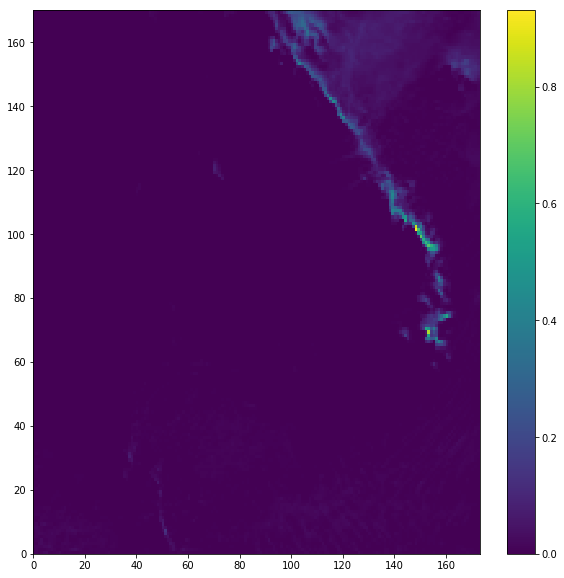

In [95]:
# print(np.shape(np.sum(s1cloudmth.__xarray_dataarray_variable__[tt,:,:,:].data,axis=2)))
# print((np.sum(s1cloudmth.__xarray_dataarray_variable__[tt,:,:,:].data,axis=2)*landmask.data))
# print((np.sum(s1cloudmth.__xarray_dataarray_variable__[tt,:,:,:].data,axis=2)))
# print(landmask.data)
plt.pcolor(s1cloud[tt,5,:,:].data)
plt.colorbar()
plt.show()

## trmm monthly ppt and wind directions

In [11]:
trmm=xr.open_dataset('../ppt_data/trmm_monthly.nc',decode_times=False)
print(trmm)
ti,nlat,nlon=trmm.PPT.shape
print(trmm.PPT.shape)
trmmmth=trmm.PPT[:228,:,:].data.reshape((-1,12,nlat,nlon))

<xarray.Dataset>
Dimensions:  (lat: 400, lon: 1440, time: 234)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * lat      (lat) float32 -49.875 -49.625 -49.375 -49.125 -48.875 -48.625 ...
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
Data variables:
    PPT      (time, lat, lon) float64 0.5119 0.5777 0.4229 0.3213 0.419 ...
Attributes:
    title:    monthly averaged precipitation combined microwave-IR with gauge...
(234, 400, 1440)


(19, 12, 400, 1440)


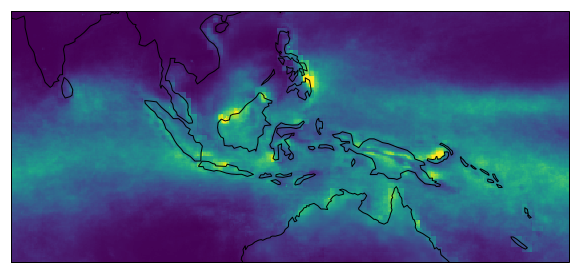

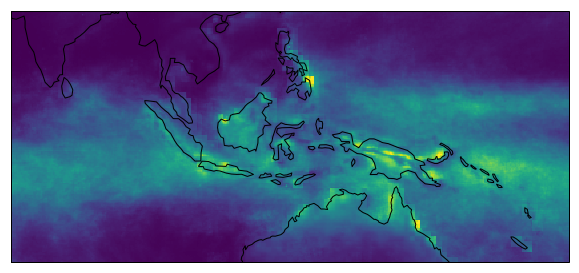

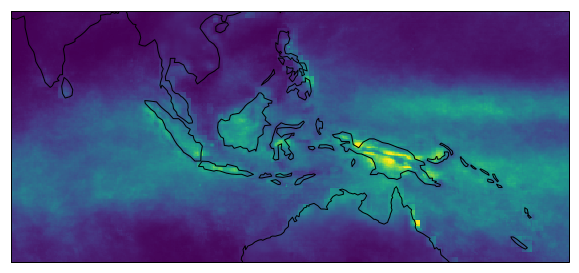

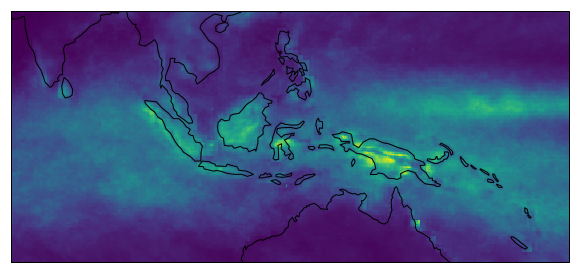

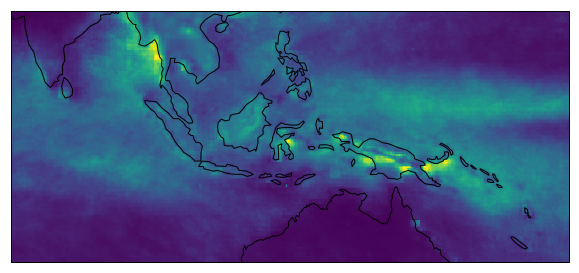

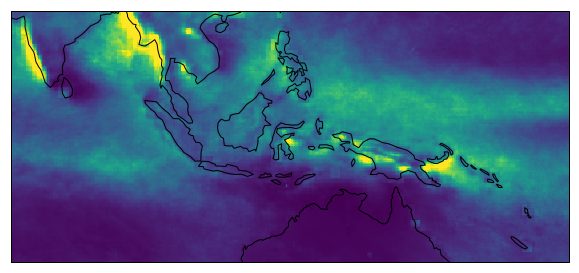

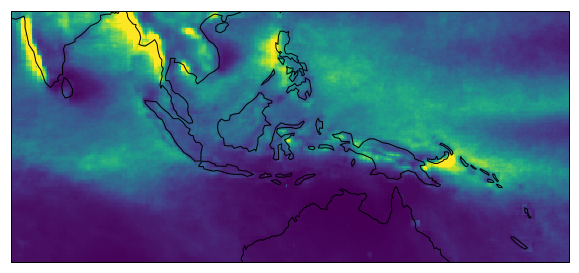

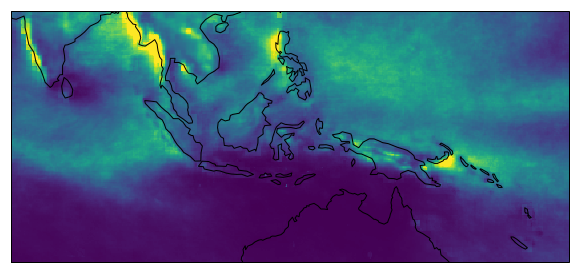

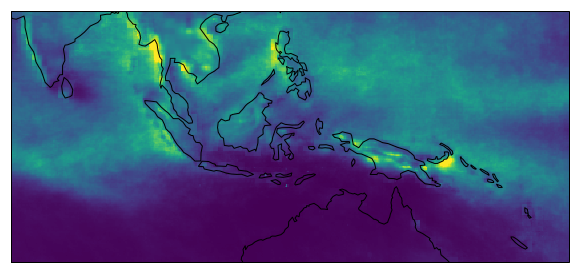

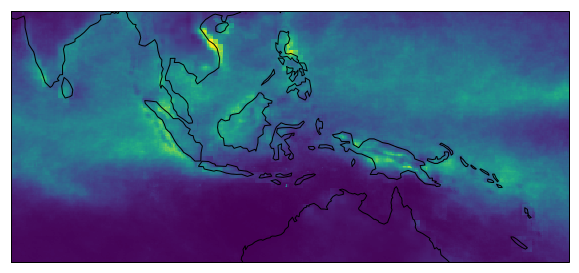

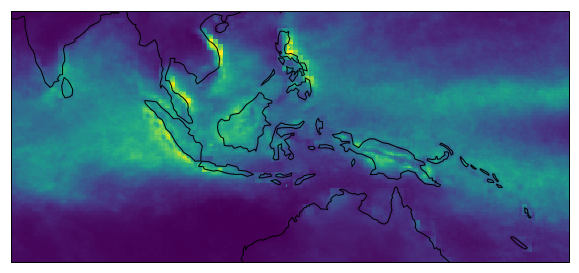

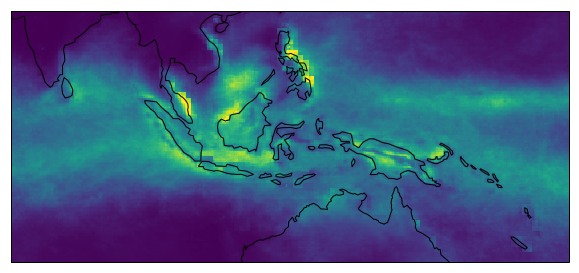

In [12]:
print(trmmmth.shape)
trmmyr=np.mean(trmmmth,axis=0)
for tt in range (0,12):
    plt.figure(tt)
    ax1=plt.subplot(projection=ccrs.PlateCarree())
    ax1.pcolor(trmm.lon[1000:-20], trmm.lat[100:-110],trmmyr[tt,100:-110,1000:-20],vmin=0,vmax=20)
    ax1.coastlines()
plt.show()

## Raw output exploration

In [2]:
out1=xr.open_dataset('../cesm_output_convert/analysis/wrfout_d01_0054-08-01_03:00:00')
print(out1.CLDFRA)

<xarray.DataArray 'CLDFRA' (Time: 1, bottom_top: 29, south_north: 99, west_east: 180)>
[516780 values with dtype=float32]
Coordinates:
    XLAT     (Time, south_north, west_east) float32 1.67043 1.67043 1.67043 ...
    XLONG    (Time, south_north, west_east) float32 80.6577 80.9078 81.1578 ...
    XTIME    (Time) object   54-07-31 03:00:00
Dimensions without coordinates: Time, bottom_top, south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  CLOUD FRACTION
    units:        
    stagger:      


/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/xarray/conventions.py:393: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/likkhian/anaconda3/envs/python3env/lib/python3.6/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [14]:
raleigh=out1.CLDFRA[0,:,5:-5,5:-5]
print(raleigh.shape)
plt.figure(1)
maxx=np.max(np.mean(raleigh,axis=0))
minn=np.min(np.mean(raleigh,axis=0))
ax1=plt.subplot(projection=ccrs.PlateCarree())
ax1.contourf(s1.lon, s1.lat,np.mean(raleigh,axis=0))
ax1.coastlines()
sm = plt.cm.ScalarMappable(cmap='viridis',norm=plt.Normalize(minn,maxx))
sm._A = []
plt.colorbar(sm,ax=ax1,shrink=0.4)
plt.show()

(29, 89, 170)


AttributeError: 'numpy.ndarray' object has no attribute 'lon'

In [ ]:
ss=np.zeros([2,2])
print(ss)
print(ss+1)